In [229]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
destination = "../generated_data"
%matplotlib inline


In [230]:
# Given functions
def get_d(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g

    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)


def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix

    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X


def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw

    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y


def draw_sample_with_noise(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw

    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """
    x = np.random.rand(N)
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

# Define our least squares estimator function


def least_squares_estimator(X, y):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1

    Returns:
    b_hat: (np.array) of size N x (deg_true + 1)
    """
    # Make sure N > d
    if X.shape[0] < X.shape[1]:
        raise ValueError("You must have at least as many rows as columns!")
    else:
        # Compute the solution for b using the closed form linear algebra solution
        b_hat = np.linalg.inv(X.T@X) @ X.T @ y
        return b_hat


def empirical_risk(X, y, b_hat):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    b_hat: (np.array) of size N x (deg_true + 1)
    Returns:
    emp_risk: (float) 
    """
    # Get # of observations
    N = X.shape[0]
    # Calculate Predictions
    y_hat = X @ b_hat
    # Calculate squared errors and then empirical risk
    sum_of_squared_errors = sum((y_hat-y)**2)
    emp_risk = sum_of_squared_errors / N
    emp_risk = emp_risk / 2  # because we have 1/2 in our loss function
    return emp_risk


def noisy_emp_and_gen_risk(d, x_train, y_train, x_test, y_test):
    """
    Inputs:
    d: (int) degree of polynomial desired
    n: (int) number of samples to be generated in 

    Outputs:
    training_error: (float) average sum of squares of loss function on training data
    generalization_error: (float) average Sum of Squares of loss function on test data
    """
    # Generate design matrices
    X_train = get_design_mat(x_train, d)
    X_test = get_design_mat(x_test, d)

    # Calculate b_hat
    b_hat = least_squares_estimator(X_train, y_train)
    training_error = empirical_risk(X_train, y_train, b_hat)
    generalization_error = empirical_risk(X_test, y_test, b_hat)

    return training_error, generalization_error, b_hat


def poly_risk_gen(d, n, x_train, y_train, x_test, y_test):
    """
    Ouptut:
    train_error_arr: (np.array) e_t for various n
    test_error_arr: (np.array) e_g for various n
    """
    # Initiliaze np arrays
    train_error_arr = []
    test_error_arr = []

    # Iterate over N
    for i in range(d+1, len(n)):

        # Get relevant subset of data
        train_x_subset = x_train[:i+1]
        train_y_subset = y_train[:i+1]

        # Calculate e_t, e_g, and append to output
        training_error, generalization_error, b_hat = noisy_emp_and_gen_risk(
            d, train_x_subset, train_y_subset, x_test, y_test)
        train_error_arr.append(training_error)
        test_error_arr.append(generalization_error)

    return train_error_arr, test_error_arr, b_hat


In [231]:
# Set the degree of the polynomial
d = 3

# Return coefficients
coef = get_d(d)

# Generate training and test data -> N_train is the size of the train sample to draw, N_test for test
N_train = 100
N_test = 1000

X_train, y_train = draw_sample(d, coef, N_train)
X_test, y_test = draw_sample(d, coef, N_test)

# Generate design matrices
Xd_train = get_design_mat(X_train, d)
Xd_test = get_design_mat(X_test, d)

b_hat = least_squares_estimator(Xd_train, y_train)

# Compare coef and b_hat values (should be same as we provide the data-generating distribution)
for i in range(len(b_hat)):
    print('Values at Index', i,
          'For Vectors b_Hat and coef', coef[i], b_hat[i])
    print("Difference rounded to 5 decimal places:",
          np.round(coef[i]-b_hat[i], 5))


Values at Index 0 For Vectors b_Hat and coef 2.3542244245506003 2.3542244245508055
Difference rounded to 5 decimal places: -0.0
Values at Index 1 For Vectors b_Hat and coef 2.2613576818054786 2.261357681806302
Difference rounded to 5 decimal places: -0.0
Values at Index 2 For Vectors b_Hat and coef 0.0534788781975877 0.05347887819645081
Difference rounded to 5 decimal places: 0.0
Values at Index 3 For Vectors b_Hat and coef 5.395578128426202 5.395578128426528
Difference rounded to 5 decimal places: -0.0


In [232]:
d = 10
N = 200
alpha = 0.05
coef = get_d(d)

print(d)
print(N)
os.makedirs('generated_data', exist_ok=True)
X_train_noise, y_train_noise = draw_sample_with_noise(d, coef, N)
X_test_noise, y_test_noise = draw_sample_with_noise(d, coef, N)
Xd_train = get_design_mat(X_train_noise, d).reshape([N, d+1])
Xd_test = get_design_mat(X_test_noise, d).reshape([N, d+1])

np.savetxt('generated_data//df_X_train.csv', Xd_train, delimiter=',')
np.savetxt('generated_data//df_y_train.csv',
           y_train_noise.reshape([1, N]), delimiter=',')
np.savetxt('generated_data//df_X_test.csv', Xd_train, delimiter=',')
np.savetxt('generated_data//df_y_test.csv',
           y_test_noise.reshape([1, N]), delimiter=',')
np.savetxt('generated_data//df_weights.csv',
           coef.reshape([1, d+1]), delimiter=',')

'''
def generate(x, d):
    return np.array([x**i for i in range(d+1)])


# Generate a helper variable
n = list(range(N))
x = np.linspace(0, 1, N)

# Ok the following requires that you have enough data pts so can just comment out as appropriate (N>=20)
# Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_1000 = poly_risk_gen(
    2, n, X_train_noise, y_train_noise, X_test_noise, y_test_noise)

# Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_1000 = poly_risk_gen(
    5, n, X_train_noise, y_train_noise, X_test_noise, y_test_noise)

# Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_1000 = poly_risk_gen(
    10, n, X_train_noise, y_train_noise, X_test_noise, y_test_noise)
func_g = coef @ generate(x, d)
func_b_hat_2 = b_hat_2_1000 @ generate(x, 2)
func_b_hat_5 = b_hat_5_1000 @ generate(x, 5)
func_b_hat_10 = b_hat_10_1000 @ generate(x, 10)

# B_hat predictions given N data points
plt.figure(figsize=(15, 8))
plt.scatter(X_train_noise[:N], y_train_noise[:N])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=[r'$f_{g(x)}$', r'$f_{\hat{b}(x; d=2)}$',
           r'$f_{\hat{b}(x; d=5)}$', r'$f_{\hat{b}(x; d=10)}$', 'Training Data'])
plt.title(
    "Polynomial Estimation Functions vs Ground Truth and Training Data, N={n}".format(n=N))
plt.savefig('generated_data//loss_over_N')
'''

10
200


'\ndef generate(x, d):\n    return np.array([x**i for i in range(d+1)])\n\n\n# Generate a helper variable\nn = list(range(N))\nx = np.linspace(0, 1, N)\n\n# Ok the following requires that you have enough data pts so can just comment out as appropriate (N>=20)\n# Calculate e_g, e_t for various N\'s of polynomial degree 2\ntrain_error_arr_2, test_error_arr_2, b_hat_2_1000 = poly_risk_gen(\n    2, n, X_train_noise, y_train_noise, X_test_noise, y_test_noise)\n\n# Calculate e_g, e_t for various N\'s of polynomial degree 5\ntrain_error_arr_5, test_error_arr_5, b_hat_5_1000 = poly_risk_gen(\n    5, n, X_train_noise, y_train_noise, X_test_noise, y_test_noise)\n\n# Calculate e_g, e_t for various N\'s of polynomial degree 10\ntrain_error_arr_10, test_error_arr_10, b_hat_10_1000 = poly_risk_gen(\n    10, n, X_train_noise, y_train_noise, X_test_noise, y_test_noise)\nfunc_g = coef @ generate(x, d)\nfunc_b_hat_2 = b_hat_2_1000 @ generate(x, 2)\nfunc_b_hat_5 = b_hat_5_1000 @ generate(x, 5)\nfunc_b_ha

In [233]:
def compute_square_loss(X, y, theta):
    assert X.shape[1] == theta.shape[0], print("Dimensions don't match for X and theta - ", X.shape, theta.shape)
    preds = X @ theta
    m = len(y)
    assert len(preds) == len(y), print("Dimensions don't match for preds and y - ", preds.shape, y.shape)
    loss = (1.0/m) * ((preds-y).T @ (preds - y))  # * np.sum((preds - y)**2)
    return loss


def compute_square_loss_gradient(X, y, theta):
    assert X.shape[1] == theta.shape[0], print("Dimensions don't match for X and theta - ", X.shape, theta.shape)
    preds = X @ theta
    m = len(y)
    grad = (2.0/m) * ((preds - y) @ X)
    return grad


def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    fn_gradient = compute_square_loss_gradient(
        X, y, theta)  # The true gradient
    num_features = theta.shape[0]
    # Initialize the gradient we approximate
    approx_grad = np.zeros(num_features)
    e = [np.zeros(num_features) for i in range(num_features)]
    for i in range(num_features):
        e[i][i] = 1
    approx = []
    for ei in e:
        upper = compute_square_loss(X, y, theta + epsilon*ei)
        lower = compute_square_loss(X, y, theta - epsilon*ei)
        approx.append((upper - lower)/(2.0 * epsilon))

    approx = np.asarray(approx)
    if np.linalg.norm(fn_gradient - approx) > tolerance:
        return False
    return True

def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  # Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  # Initialize loss_hist
    theta = np.zeros(num_features)  # Initialize theta

    for step in range(num_step):
        theta_hist[step] = theta
        loss_hist[step] = compute_square_loss(X, y, theta)
        gradient = compute_square_loss_gradient(X, y, theta)

        if grad_check:
            if not grad_checker(X, y, theta):
                sys.exit("ERROR: INCORRECT GRADIENT")
            else:
                sys.stdout.write("GRAD CHECK PASSED\n")

        theta -= alpha*gradient

    # Off by one at end of arrays so recompute
    theta_hist[step+1] = theta
    loss_hist[step+1] = compute_square_loss(X, y, theta)

    return theta_hist, loss_hist

def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
	assert X.shape[1] == theta.shape[0], print("Dimensions don't match for X and theta - ", X.shape, theta.shape)
	preds = X @ theta
	m = len(y)
	grad = ((2.0/m) * ((preds - y) @ X)) + (2 * lambda_reg * theta)
	return grad

def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
	num_instances, num_features = X.shape[0], X.shape[1]
	theta = np.zeros(num_features) #Initialize theta
	theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
	loss_hist = np.zeros(num_step+1) #Initialize loss_hist

	for i in range(num_step+1):
		theta_hist[i] = theta
		loss_hist[i] = compute_square_loss(X, y, theta)
		if i == num_step:
			break
		grad = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
		theta = theta - alpha*grad
	return loss_hist, theta_hist

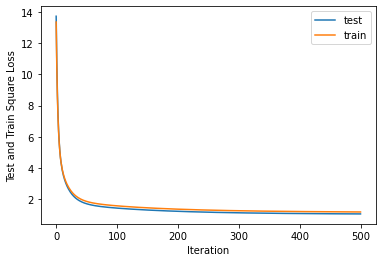

In [234]:
X_train_noise, y_train_noise = draw_sample_with_noise(d, coef, N)
X_test_noise, y_test_noise = draw_sample_with_noise(d, coef, N)
Xd_train = get_design_mat(X_train_noise, d).reshape([N, d+1])
Xd_test = get_design_mat(X_test_noise, d).reshape([N, d+1])

theta_hist, loss_hist = batch_grad_descent(Xd_train, y_train_noise, alpha=alpha, num_step=500, grad_check=False)

loss_test = []
for t in range(len(theta_hist)):
    loss_test.append(compute_square_loss(Xd_test, y_test_noise, theta_hist[t]))
plt.plot(loss_test, label='test')
plt.plot(loss_hist, label='train')
plt.legend()
plt.ylabel('Test and Train Square Loss')
plt.xlabel('Iteration')
plt.savefig("generated_data/loss_batch_py.jpg", bbox_inches='tight')
plt.show()

